In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [2]:
def remove_bcs_outliers(donkeys):
    return donkeys[(donkeys['BCS'] >= 1.5) & (donkeys['BCS'] <= 4)] 

def remove_weight_outliers(donkeys):
    return donkeys[(donkeys['Weight'] >= 40)]

donkeys = (pd.read_csv('data/donkeys.csv')
           .pipe(remove_bcs_outliers)
           .pipe(remove_weight_outliers))

np.random.seed(42)
indices = np.arange(len(donkeys))
np.random.shuffle(indices)
n_train = int(np.round((len(donkeys)*0.8)))

train_set = donkeys.iloc[indices[:n_train]]
test_set = donkeys.iloc[indices[n_train:]]

# Exploring

Let's look at the features in our dataframe for shapes and relationships that will help us make transformations and models ({numref}`Chapter %s <ch:eda>`). We start by looking at how the categorical features of age, sex, and body condition relate to weight:

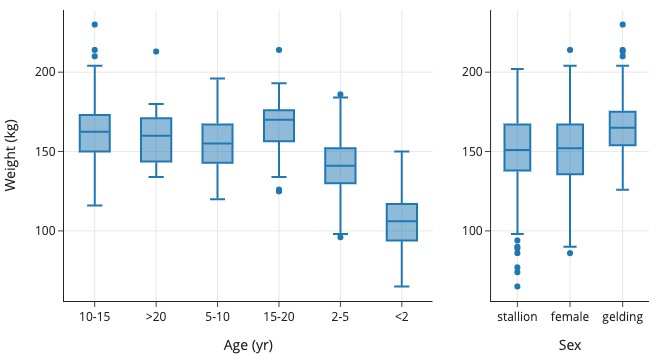

In [3]:
f1 = px.box(train_set, x="Age", y="Weight", 
            category_orders = {"Age":['<2', '2-5', '5-10', 
                                      '10-15', '15-20', '>20']})
f2 = px.box(train_set, x="Sex", y="Weight")

# We wrote the left_right function as a shorthand for plotly's make_subplots
fig = left_right(f1, f2, column_widths=[0.7, 0.3])

fig.update_xaxes(title='Age (yr)', row=1, col=1)
fig.update_xaxes(title='Sex', row=1, col=2)
fig.update_yaxes(title='Weight (kg)', row=1, col=1)

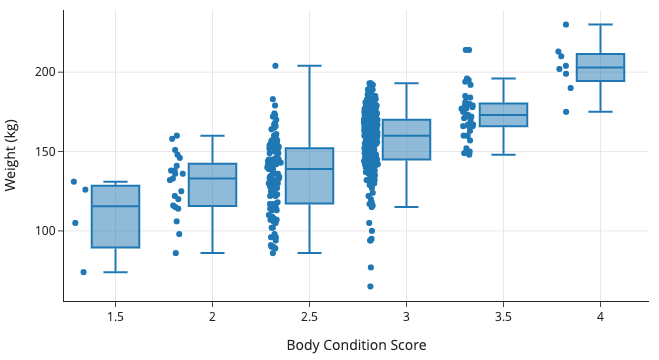

In [5]:
fig = px.box(train_set, x="BCS", y="Weight", points="all",
             labels={'Weight':'Weight (kg)', 'BCS':'Body Condition Score'},
             width=550, height=250)
fig

Notice that we plotted the points as well as the boxes for the body condition score because we saw earlier that there are only a handful of observations with a score of 1.5, so we don't want to read too much into a box plot with only a few data points ({numref}`Chapter %s <ch:viz>`). It appears that the median weight increases with the body condition score, but not in a simple linear fashion. On the other hand, weight distributions for the three sex categories appear roughly the same. As for age, once a donkey reaches five years, the distribution of weight doesn't seem to change much.
But donkeys under age 2 and donkeys from 2 to 5 years of age have lower weights in general.

Next, let's examine the quantitative variables. We plot all pairs of quantitative variables in the scatter plot matrix:  

In [100]:
train_numeric = train_set[['Weight', 'Length', 'Girth', 'Height']]

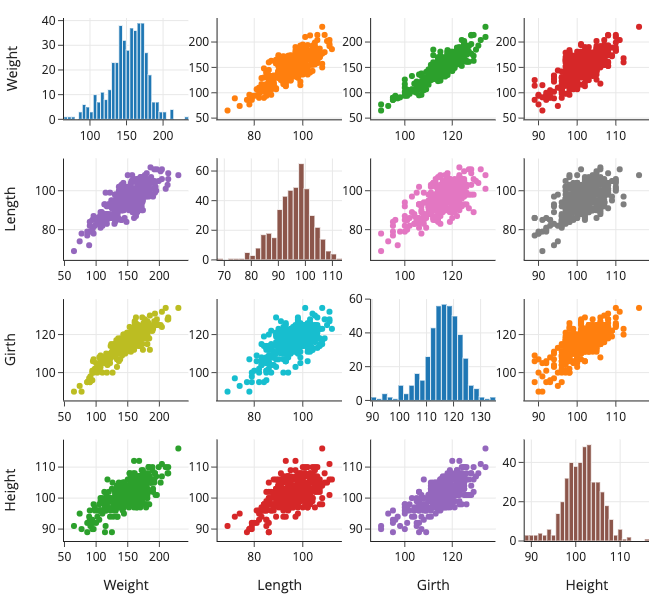

In [101]:
import plotly.figure_factory as ff

ff.create_scatterplotmatrix(train_numeric, diag='histogram', 
                            title='', height=600, width=600)

The height, length, and girth of donkeys all appear linearly associated with weight and with each other. This is not too surprising; given one of the donkey's dimensions, we should have a good guess about the other dimensions. Girth appears most highly correlated with weight, and this is confirmed by the correlation coefficient matrix:  

In [102]:
train_numeric.corr()

,Weight,Length,Girth,Height
Weight,1.00,0.78,0.90,0.71
Length,0.78,1.00,0.66,0.58
Girth,0.90,0.66,1.00,0.70
Height,0.71,0.58,0.70,1.00


Our explorations uncovered several aspects of the data that may be relevant for modeling. We found that the donkey's girth, length, and height all have linear associations with weight and with each other, and girth has the strongest linear relationship with weight. We also observed that the body condition score has a positive association with weight; the sex of the donkey does not appear related to weight; and neither does age for those donkeys over 5 years.
In the next section, we use these findings to build our model.